In [26]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from rdkit import Chem
from dft_descriptors import prepocessing as pp
from dft_descriptors import numbering_CO as nb

In [27]:
df = pd.read_csv('../data_csv/Data_test11032021.csv', sep = ',')
df = pp.preprocess(df)
dft_ax = pd.read_csv('../data_csv/AX_dft.csv')
dft_lig = pd.read_csv('../data_csv/ligand_dft.csv')
dft_oc = pd.read_csv('../data_csv/substrate_dft.csv')

In [28]:
#df["Reactant Smile (C-O)"].unique()

In [29]:
dft_ax["rdkit_can"]  = [Chem.CanonSmiles(smi) for smi in dft_ax["Unnamed: 0"]]
dft_lig["rdkit_can"] = [Chem.CanonSmiles(smi) for smi in dft_lig["Unnamed: 0"]]
dft_oc["rdkit_can"]  = [Chem.CanonSmiles(smi) for smi in dft_oc["Unnamed: 0"]]
dft_oc

,Unnamed: 0,number_of_atoms,charge,multiplicity,dipole,molar_mass,molar_volume,electronic_spatial_extent,E_scf,zero_point_correction,...,ES_<S**2>_9,at_0,at_1,at_2,at_3,at_4,at_5,at_6,at_7,rdkit_can
0,COc1ccc(cc1)C,19,0,1,1.2759,122.1664,1114.154,1408.3705,-386.087013,0.161012,...,0.0,C,O,C,C,C,C,C,C,COc1ccc(C)cc1
1,COc1ccc2c(c1)cccc2,22,0,1,1.1745,158.1994,1421.914,2212.0661,-500.411772,0.180620,...,0.0,C,O,C,C,C,C,C,C,COc1ccc2ccccc2c1
2,OCCc1ccc(cc1)OC,23,0,1,2.2007,152.1926,1340.848,2603.3111,-500.604058,0.194937,...,0.0,C,O,C,C,C,C,C,C,COc1ccc(CCO)cc1
3,OCc1ccc(cc1)OC,20,0,1,1.0039,138.1658,1325.584,1864.2988,-461.288270,0.166201,...,0.0,C,O,C,C,C,C,C,C,COc1ccc(CO)cc1
4,CC(Oc1ccc2c(c1)cccc2)C,28,0,1,1.1931,186.2530,2191.741,3471.5787,-579.046324,0.236925,...,0.0,C,O,C,C,C,C,C,C,CC(C)Oc1ccc2ccccc2c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,c1ccc2c(c1)OCC2,17,0,1,1.5696,120.1506,984.086,1044.2564,-384.880341,0.140934,...,0.0,C,O,C,C,C,C,C,C,c1ccc2c(c1)CCO2
370,c1ccc2c(c1)cc1c(c2)oc2c1cc1ccccc1c2,33,0,1,0.8459,268.3142,2051.181,7791.9681,-844.603002,0.258081,...,0.0,C,O,C,C,C,C,C,C,c1ccc2cc3c(cc2c1)oc1cc2ccccc2cc13
371,c1ccc2c(c1)oc1c2cccc1,21,0,1,0.6462,168.1946,1731.214,2262.2973,-537.327117,0.164729,...,0.0,C,O,C,C,C,C,C,C,c1ccc2c(c1)oc1ccccc12
372,CC(=O)Oc1ccc2c(c1)ccc(c2)OC(=O)C,30,0,1,2.2288,244.2464,2208.592,6858.5301,-841.638394,0.231237,...,0.0,C,O,C,C,C,C,C,C,CC(=O)Oc1ccc2cc(OC(C)=O)ccc2c1


In [30]:
canon_oc = np.unique(df["Reactant Smile (C-O)"])
canon_ax = np.unique(df["A-X effectif"])
sub_df = df.dropna(subset=["Ligand effectif"])
smi_ligs = np.unique([pp.dict_ligand[lig] for lig in sub_df["Ligand effectif"]])
canon_lig = np.unique([Chem.CanonSmiles(smi) for smi in smi_ligs])

7


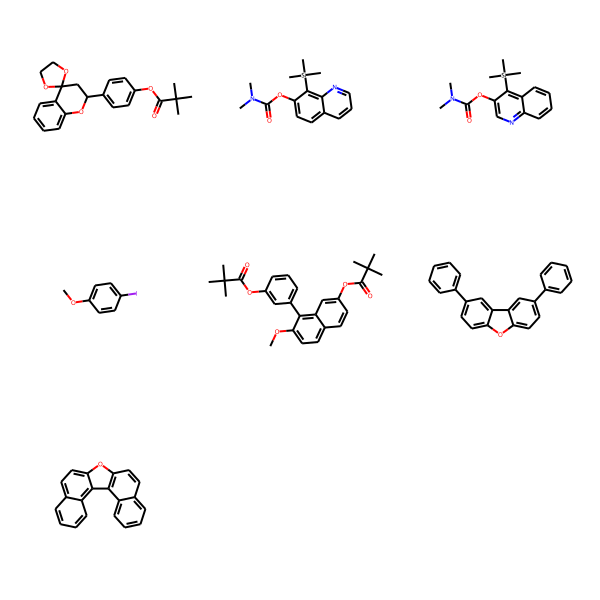

In [31]:
missing_oc = []
mols_oc = []
for smi in canon_oc:
    if smi not in list(dft_oc["rdkit_can"]):
        missing_oc.append(smi)
        mols_oc.append(Chem.MolFromSmiles(smi))

print(len(missing_oc))
Chem.Draw.MolsToGridImage(mols_oc)

In [32]:
missing_oc

['CC(C)(C)C(=O)Oc1ccc(C2CC3(OCCO3)c3ccccc3O2)cc1',
 'CN(C)C(=O)Oc1ccc2cccnc2c1[Si](C)(C)C',
 'CN(C)C(=O)Oc1cnc2ccccc2c1[Si](C)(C)C',
 'COc1ccc(I)cc1',
 'COc1ccc2ccc(OC(=O)C(C)(C)C)cc2c1-c1cccc(OC(=O)C(C)(C)C)c1',
 'c1ccc(-c2ccc3oc4ccc(-c5ccccc5)cc4c3c2)cc1',
 'c1ccc2c(c1)ccc1oc3ccc4ccccc4c3c12']

In [34]:
missing_lig = []
mols_lig = []
for smi in canon_lig:
    if smi not in list(dft_lig["rdkit_can"]):
        #print(smi)
        missing_lig.append(smi)
        mols_lig.append(Chem.MolFromSmiles(smi))
missing_lig

['CC(C)(C)P(C(C)(C)C)C(C)(C)C',
 'CC(C)(C)P(C1CCCC1)C(C)(C)C.CC(C)(C)P(C1CCCC1)C(C)(C)C.[Fe]',
 'CC(C)N1c2ccccc2N(C(C)C)C1[C]C1N(C)c2ccccc2N1C',
 'CC(C)N1c2ccccc2N(C)C1[C]C1N(C)c2ccccc2N1C(C)C',
 'CC(C)P([C]1[CH][CH][CH][CH]1)C(C)C.CC(C)P([C]1[CH][CH][CH][CH]1)C(C)C.[Fe]',
 'CCCP(CCC)C1CCCC1.CCCP(CCC)C1CCCC1.[Fe]',
 'Cc1ccc(P(c2ccc(C)cc2)c2ccc(C)cc2)cc1',
 'Cc1ccccc1P(c1ccccc1C)c1ccccc1C',
 '[CH]1[CH][CH][C](P(C2CCCCC2)C2CCCCC2)[CH]1.[CH]1[CH][CH][C](P(C2CCCCC2)C2CCCCC2)[CH]1.[Fe]',
 '[CH]1[CH][CH][C](P(c2ccccc2)c2ccccc2)[CH]1.[CH]1[CH][CH][C](P(c2ccccc2)c2ccccc2)[CH]1.[Fe]',
 '[C]1N(C23CC4CC(CC(C4)C2)C3)C=CN1C12CC3CC(CC(C3)C1)C2',
 'c1ccc(P(CCCCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1',
 'c1ccc(P(c2ccccc2)c2ccccc2)cc1']

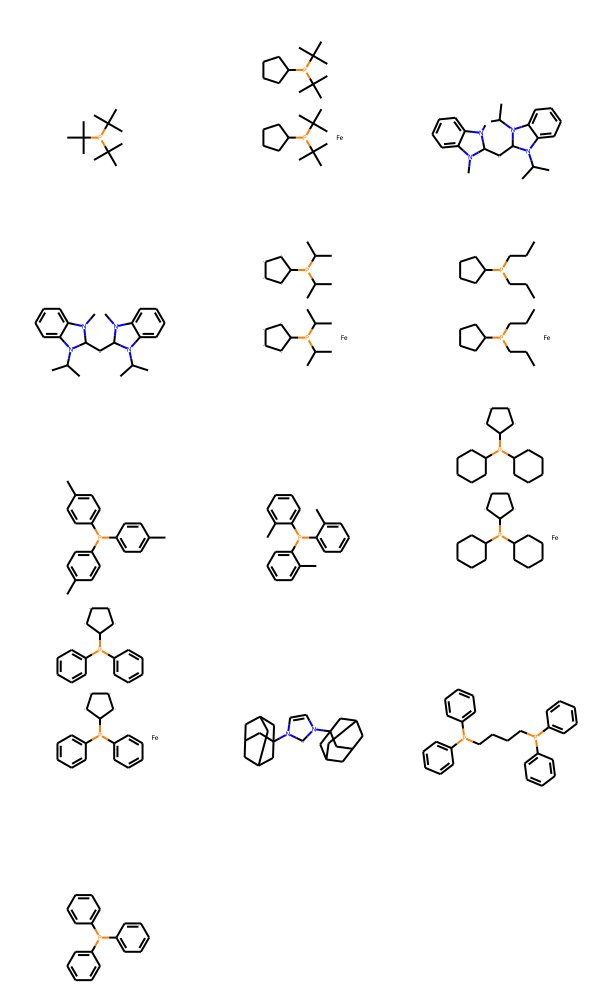

In [35]:
Chem.Draw.MolsToGridImage(mols_lig)

In [36]:
missing = len(canon_lig) - len(dft_lig)
print(len(missing_lig))

13


In [37]:
missing_ax = []
mols_ax = []
for smi in canon_ax:
    if smi not in list(dft_ax["rdkit_can"]):
        print(smi)
        missing_ax.append(smi)
        mols_ax.append(Chem.MolFromSmiles(smi))

CC(C)C[Al](CC(C)C)c1ccc(F)cc1
CC1(C)COB(c2cccc(C(F)(F)F)c2)OC1
CCCCc1ccc(B2OB(c3ccc(CCCC)cc3)OB(c3ccc(CCCC)cc3)O2)cc1
COc1cc(OC)cc([Al](CC(C)C)CC(C)C)c1
COc1cccc(B(O)O)c1
Cc1cc(C)c([Mg]Br)c(C)c1
Cc1ccc([Mg]I)cc1
Cc1cccc(C)c1[Al](CC(C)C)CC(C)C
Cc1ccccc1B1OCC(C)(C)CO1
[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1
[Li]c1ccc(O[Si](C)(C)C(C)(C)C)cc1
[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1


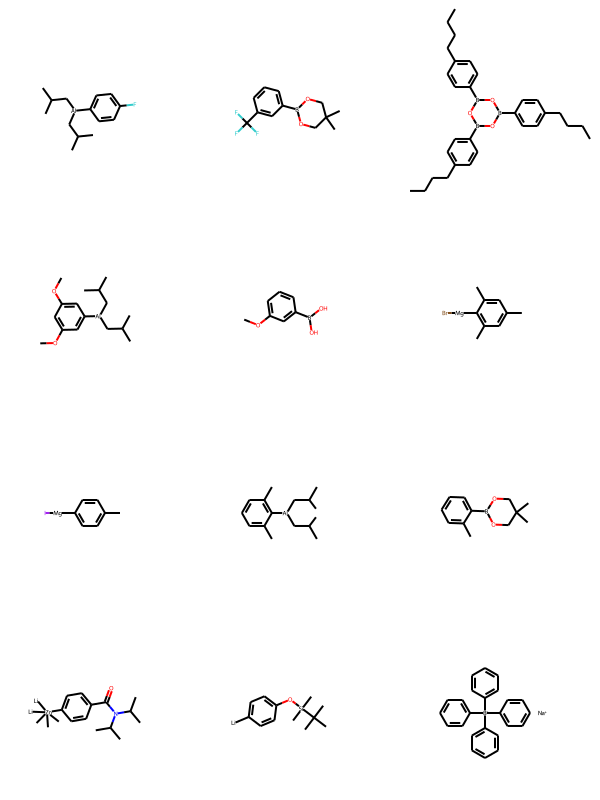

In [38]:
Chem.Draw.MolsToGridImage(mols_ax)

In [39]:
missing_ax

['CC(C)C[Al](CC(C)C)c1ccc(F)cc1',
 'CC1(C)COB(c2cccc(C(F)(F)F)c2)OC1',
 'CCCCc1ccc(B2OB(c3ccc(CCCC)cc3)OB(c3ccc(CCCC)cc3)O2)cc1',
 'COc1cc(OC)cc([Al](CC(C)C)CC(C)C)c1',
 'COc1cccc(B(O)O)c1',
 'Cc1cc(C)c([Mg]Br)c(C)c1',
 'Cc1ccc([Mg]I)cc1',
 'Cc1cccc(C)c1[Al](CC(C)C)CC(C)C',
 'Cc1ccccc1B1OCC(C)(C)CO1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1',
 '[Li]c1ccc(O[Si](C)(C)C(C)(C)C)cc1',
 '[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1']

In [ ]:
missing = len(canon_ax) - len(dft_ax)
print(len(missing_ax))

In [ ]:
missing_ax

In [ ]:
Chem.MolFromSmiles("CC(=O)[O-].CC(=O)[O-].[Ag]")